In [95]:
import numpy as np

### Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

In [182]:
m = np.diag([1,-1])
print(m)

[[ 1  0]
 [ 0 -1]]


In [183]:
# проверка
np.dot(m.T, m) 

array([[1, 0],
       [0, 1]])

b) Верхнетреугольная, ортогональная

In [188]:
m2 = np.triu(m)
print(m2)

[[ 1  0]
 [ 0 -1]]


In [191]:
# проверка
np.dot(m2.T, m2)

array([[1, 0],
       [0, 1]])

c) Нижнетреугольная, ортогональная

In [193]:
m3 = np.tril(m)
print(m3)

[[ 1  0]
 [ 0 -1]]


In [194]:
# проверка
np.dot(m2.T, m2)

array([[1, 0],
       [0, 1]])

d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [195]:
m4 = np.array([[6, 5], 
               [7, 6]])

In [207]:
# проверка
round(np.linalg.det(m4),)

1

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

In [8]:
m5 = np.array([[2, 2],
              [1, 3]])
print(m5)

[[2 2]
 [1 3]]


In [17]:
v, w = np.linalg.eigh(m5)

In [18]:
v

array([1.38196601, 3.61803399])

In [19]:
w

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

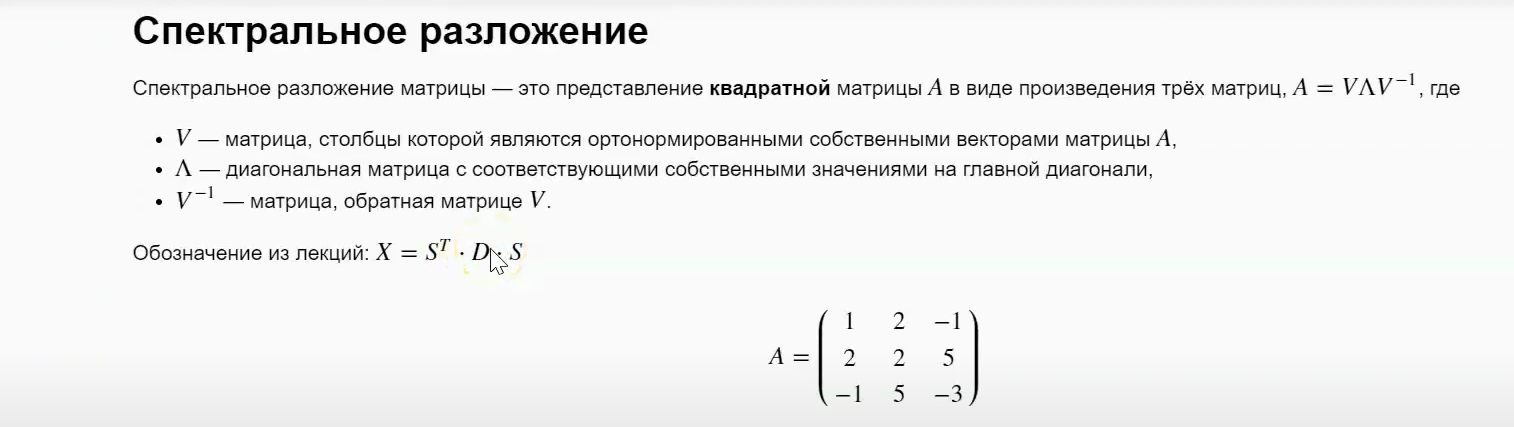

In [28]:
from IPython.display import Image
Image(filename='Снимок.png')

### Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])
print(m)

In [24]:
m_1 = np.array([[1, 2], [2, 3]]) 
print(m_1)

[[1 2]
 [2 3]]


Сначала находим собственные значения и собственные вектора матрицы

In [33]:
value, w = np.linalg.eigh(m_1)

In [34]:
value

array([-0.23606798,  4.23606798])

In [35]:
w

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [36]:
D = np.diag(value)

In [37]:
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [38]:
S = w.T

In [39]:
S

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [40]:
S.T

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [43]:
# проверка

In [44]:
np.dot(S.T, S) 

array([[ 1.0000000e+00, -1.2127222e-17],
       [-1.2127222e-17,  1.0000000e+00]])

In [45]:
np.dot(np.dot(S.T, D), S)

array([[1., 2.],
       [2., 3.]])

### Постройте зависимость качества восстановления рукописных цифр (MNIST) 
в зависимости от различного количества компонент PCA.

В качестве метрики различия предлагаю использовать MSE.*

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
X, y = load_digits(return_X_y=True)

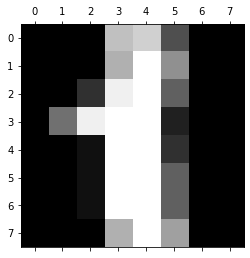

In [307]:
image = X[1]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [308]:
U, s, V = np.linalg.svd(image)
n_component = 3
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -0.32 0.16 12.00 12.98 5.03 0.00 0.00]
 [0.00 -0.09 0.10 11.26 15.65 9.27 0.00 0.00]
 [0.00 0.79 2.57 14.92 16.17 5.83 0.00 0.00]
 [0.00 6.89 15.06 16.02 15.97 2.03 0.00 0.00]
 [0.00 -0.13 1.17 16.48 15.35 3.50 0.00 0.00]
 [0.00 -0.07 0.98 15.69 16.40 5.69 0.00 0.00]
 [0.00 -0.07 0.98 15.69 16.40 5.69 0.00 0.00]
 [0.00 -0.07 0.03 10.99 16.00 10.00 0.00 0.00]]


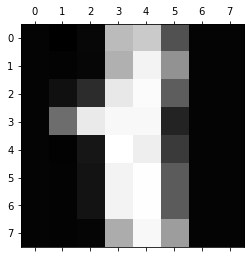

In [286]:
plt.matshow(A, cmap = 'gray')

In [287]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9744017807456873

In [296]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = pca.fit(X)
data_list = pca.transform(X)

In [299]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [298]:
data_list

array([[1.38, 0.29],
       [2.22, -0.25],
       [3.61, 0.04],
       [-1.38, -0.29],
       [-2.22, 0.25],
       [-3.61, -0.04]])

In [303]:
data_list_2 = pca.inverse_transform(data_list)

In [304]:
data_list_2

array([[-1.00, -1.00],
       [-2.00, -1.00],
       [-3.00, -2.00],
       [1.00, 1.00],
       [2.00, 1.00],
       [3.00, 2.00]])